# Twitter Sentiment Classification using Machine Learning

This project performs **entity-level sentiment Classification** on Twitter data. Each message is analyzed in the context of a specific entity (e.g., a brand or topic), and the sentiment expressed toward that entity is classified.

## Dataset

The dataset used for this project is available on Kaggle:  
👉 [Twitter Entity Sentiment Analysis Dataset](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/)

- It contains tweets along with associated entities and sentiment labels.
- Sentiment labels include: **Positive**, **Negative**, **Irrelevant** and **Neutral**.

The dataset was loaded using the following structure:

| Column     | Description                     |
|------------|---------------------------------|
| `id`       | Tweet ID                        |
| `Account`  | Entity or brand being discussed |
| `Label`    | Sentiment label (Positive/Negative/Irrelevant/Neutral) |
| `Text`     | Actual tweet/message text       |


In [18]:
import pandas as pd

df = pd.read_csv('Twitter Sentiment Analysis.csv', names=['id','Account','Label','Text'])
df = df.dropna()
df.head()

,id,Account,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Exploration: Sentiment Label Distribution

To understand the distribution of sentiment labels in the dataset, we counted the number of instances for each class. This helps us identify whether the dataset is balanced across the three sentiment classes: Positive, Negative, Irrelevant and Neutral. A significant imbalance may require special handling during model training.

In [19]:
counts = df['Label'].value_counts()
counts

Label
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

## Sentiment Distribution Visualization

To better understand the proportions of sentiment labels in the dataset, we used a pie chart. This chart visually shows the relative frequency of Positive, Negative, Irrelevant, and Neutral sentiments in the Twitter messages. This kind of visualization helps highlight any class imbalance in a more intuitive way.

Text(0.5, 1.0, 'Twitter Sentiment Analysis')

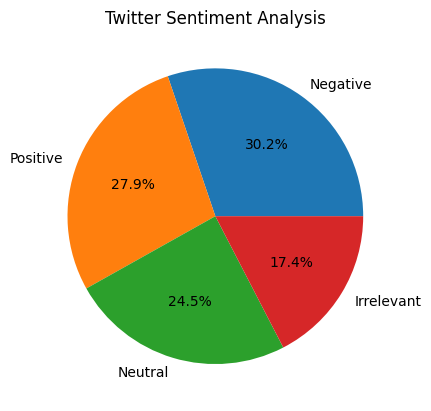

In [20]:
import matplotlib.pyplot as plt

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Twitter Sentiment Analysis')

## Text Preprocessing

Before feeding the text data into a machine learning model, it’s essential to clean and preprocess it. In this step:

- Punctuation was removed from each tweet.
- Common English stopwords were filtered out to retain only meaningful words.


In [21]:
import string
from nltk.corpus import stopwords

def text_process(text):
    text = str(text)
    nopunc = [char for char in text if char not in string.punctuation]
    clean_text = [word for word in ''.join(nopunc).split(' ') if word.lower() not in stopwords.words('english')]
    return clean_text

df['Text'].apply(text_process).head()


0     [im, getting, borderlands, murder, ]
1                  [coming, borders, kill]
2         [im, getting, borderlands, kill]
3        [im, coming, borderlands, murder]
4    [im, getting, borderlands, 2, murder]
Name: Text, dtype: object

## Feature Extraction: TF-IDF Vectorization

To convert the cleaned text into numerical features that a machine learning model can understand, **TF-IDF Vectorization** was used. 

- The `TfidfVectorizer` transforms the processed text into a matrix of TF-IDF features.
- This technique captures the importance of words by considering both their frequency in a document and how unique they are across all documents.

This vectorized representation is then used as input for model training.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

bow_transformer = TfidfVectorizer(analyzer=text_process).fit(df['Text'])
bow = bow_transformer.transform(df['Text'])

## TF-IDF Matrix Summary

After applying TF-IDF vectorization, the following characteristics were observed in the resulting matrix:

- **Vocabulary Size**: Total number of unique tokens (features) extracted from the text data.
- **BoW Shape**: The shape of the TF-IDF matrix, indicating the number of documents (rows) and features (columns).
- **Non-Zero Elements**: The total number of non-zero values in the matrix, showing how many words actually appear in the documents.
- **Sparsity (%)**: A measure of how sparse the matrix is (


In [23]:
pd.DataFrame({
    " ":['Vocabulary Size','Bow shape','Non-zero elements','Sparsity (%)'],
    "Value":[len(bow_transformer.vocabulary_),bow.shape,bow.nnz,(bow.nnz*100)/(bow.shape[0]*bow.shape[1])]
})

,,Value
0,Vocabulary Size,51353
1,Bow shape,"(73996, 51353)"
2,Non-zero elements,825868
3,Sparsity (%),0.021734


## Model Training and Evaluation: Naive Bayes Classifier

For this project, the **Multinomial Naive Bayes** classifier was used to predict the sentiment of each tweet based on the TF-IDF features.

- The model was trained using the full dataset (train and test data combined).
- After training, predictions were made for each data point in the dataset.
  
To evaluate the model, we used various classification metrics such as precision, recall, F1-score, and accuracy.

### Model Performance:

The **classification report** shows the performance of the Naive Bayes model across different sentiment labels (Positive, Negative, Neutral, and Irrelevant). It provides a detailed analysis of how well the model is performing for each class.

The key metrics include:
- **Precision**: How many selected items are relevant.
- **Recall**: How many relevant items are selected.
- **F1-Score**: The harmonic mean of precision and recall.


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB().fit(bow, df['Label'])
predict = model.predict(bow)

print(classification_report(df['Label'],predict))

              precision    recall  f1-score   support

  Irrelevant       0.99      0.57      0.73     12875
    Negative       0.73      0.94      0.82     22358
     Neutral       0.90      0.73      0.81     18108
    Positive       0.79      0.88      0.83     20655

    accuracy                           0.81     73996
   macro avg       0.85      0.78      0.80     73996
weighted avg       0.83      0.81      0.80     73996



## Model Training and Evaluation: Random Forest Classifier

In addition to the Naive Bayes model, we also used the **Random Forest Classifier** to predict the sentiment of each tweet. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions.

- The model was trained on the same dataset used for Naive Bayes (full dataset).
- Predictions were made for each data point in the dataset.

### Model Performance:

The **classification report** shows the performance of the Random Forest model across different sentiment labels (Positive, Negative, Neutral, and Irrelevant). It provides a detailed analysis of how well the model is performing for each class.

Compared to Naive Bayes, the Random Forest Classifier showed significant improvements in terms of accuracy, precision, recall, and F1-score.

The key metrics include:
- **Precision**: How many selected items are relevant.
- **Recall**: How many relevant items are selected.
- **F1-Score**: The harmonic mean of precision and recall.


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(bow, df['Label'])
predict = model.predict(bow)

print(classification_report(df['Label'],predict))

              precision    recall  f1-score   support

  Irrelevant       1.00      0.97      0.98     12875
    Negative       1.00      0.97      0.98     22358
     Neutral       0.97      0.98      0.98     18108
    Positive       0.95      0.99      0.97     20655

    accuracy                           0.98     73996
   macro avg       0.98      0.98      0.98     73996
weighted avg       0.98      0.98      0.98     73996



## Data Splitting: Train-Test Split

To evaluate the performance of the machine learning models, the dataset is split into training and testing sets. This allows for proper evaluation of how the model will perform on unseen data.

### Process:
- **X (Features)**: The text data (tweets) from the dataset.
- **y (Labels)**: The sentiment labels (Positive, Negative, Neutral, Irrelevant) for each tweet.

We used the **train_test_split** function from `scikit-learn` to divide the data:
- 70% of the data was used for training the model.
- 30% of the data was set aside for testing the model's performance.

The `random_state=42` ensures that the split is reproducible, meaning the same split can be achieved each time the code is run.


In [26]:
from sklearn.model_selection import train_test_split

X = df['Text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training: Using a Pipeline

In this project, a **Pipeline** is used to streamline the process of transforming the data and training the model. The pipeline includes two main steps:

1. **TF-IDF Vectorization**: This step uses the `TfidfVectorizer` to convert the text data (tweets) into numerical features. The `text_process` function is applied to clean and preprocess the text (removing punctuation and stopwords).
   
2. **Model Training**: The **Multinomial Naive Bayes (MultinomialNB)** classifier is used to train the model based on the TF-IDF features.

The pipeline allows for easy integration of these steps into a single process, which simplifies the training and prediction workflow.

### Process:
- The training data (`X_train`, `y_train`) is used to fit the model.
- The model is then tested on the test data (`X_test`), and its performance is evaluated using classification metrics such as precision, recall, and F1-score.

The results give an overview of how well the model performs on unseen data, providing insights into its ability to classify sentiment in Twitter messages.


In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',TfidfVectorizer(analyzer=text_process)),
    ('classifier',MultinomialNB())
])

pipeline.fit(X_train, y_train)

predict = pipeline.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.35      0.51      4023
    Negative       0.64      0.91      0.75      6598
     Neutral       0.82      0.62      0.71      5421
    Positive       0.69      0.81      0.75      6157

    accuracy                           0.71     22199
   macro avg       0.78      0.67      0.68     22199
weighted avg       0.76      0.71      0.70     22199



## Model Training: Using a Pipeline with Random Forest Classifier

In this project, we also use a **Pipeline** to streamline the process of transforming the text data and training a **Random Forest Classifier** model. The pipeline consists of two key components:

1. **TF-IDF Vectorization**: The `TfidfVectorizer` is used to convert the raw text (tweets) into numerical features. The `text_process` function cleans and preprocesses the text by removing punctuation and stopwords before the vectorization step.
   
2. **Model Training**: The **Random Forest Classifier** is used as the classification model. Random Forest is an ensemble method that constructs multiple decision trees and merges their outputs for better predictive performance.

### Process:
- The pipeline first fits the training data (`X_train`, `y_train`) by transforming the text into feature vectors and then training the model.
- The model is then used to predict the sentiment labels on the test data (`X_test`), and the results are evaluated using classification metrics such as precision, recall, and F1-score.

The **Random Forest** classifier, being an ensemble model, can provide more robust predictions compared to simpler models and may improve classification accuracy by reducing overfitting and variance.


In [28]:
pipeline = Pipeline([
    ('bow',TfidfVectorizer(analyzer=text_process)),
    ('classifier',(RandomForestClassifier()))
])

pipeline.fit(X_train, y_train)

predict = pipeline.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.75      0.84      4023
    Negative       0.88      0.90      0.89      6598
     Neutral       0.83      0.85      0.84      5421
    Positive       0.83      0.91      0.86      6157

    accuracy                           0.86     22199
   macro avg       0.87      0.85      0.86     22199
weighted avg       0.87      0.86      0.86     22199



## Final Decision

### Accuracy Overview:

- **Naive Bayes (Manual Model)**:
  - Accuracy: **81%** on the full dataset.
  - Tended to **overfit**, performing better on training data than on unseen inputs.

- **Random Forest (Manual Model)**:
  - Accuracy: **98%** on the full dataset.
  - Performed well overall, with less overfitting compared to Naive Bayes.

---

### Pipeline Model Performance:

- **Naive Bayes (Pipeline)**:
  - Test Accuracy: **71%**
  - Moderate performance; the model learned training patterns but struggled to generalize.

- **Random Forest (Pipeline)**:
  - Test Accuracy: **86%**
  - Best performing model.
  - Strong generalization and stable accuracy on unseen data.

---

### Summary:

- **Manual models** showed signs of **overfitting**, especially Naive Bayes.
- **Pipeline models** improved preprocessing and consistency.
- The **Random Forest pipeline** achieved the best results with **86% test accuracy**, making it the most reliable option for sentiment prediction.
